In [1]:
from patchseq_utils import l1_load, util, plot_umap as pu

from importlib import reload
reload(l1_load)
reload(util)

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/l1_load.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  human_df['primary_ephys'] = human_df.eval('collaborator=="AIBS" & failed_fx_long_squares==False')


<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [2]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from patchseq_utils import analysis as utils, plotting as plot
from adjustText import adjust_text
sns.set(style='ticks', context='talk')
# sns.set(style='ticks', context='notebook')

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Mouse

In [4]:
# path = projectdir/"seurat_umap_mouse.csv"
path = projectdir/"seurat_mouse_sct.csv"
umap_mouse = pd.read_csv(path, index_col=0)
mouse_df = mouse_df.join(umap_mouse, on='sample_id')

In [5]:
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/Mm_VISp_AIT2.3.0_20047_202005/"
mouse_facs = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False).set_index('sample_id')

In [6]:
mouse_facs = mouse_facs.join(umap_mouse)
mouse_facs[cluster] = mouse_facs['cluster'].astype(ttypes_mouse)

In [7]:
# x='all_x', y='all_y'
x='UMAP_1'
y='UMAP_2'
l1 = mouse_facs[mouse_facs['cluster'].isin(l1_types_mouse)]
l1[y] *= -1
mouse_df[y] *= -1

/tmp/ipykernel_24348/3842138096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1[y] *= -1


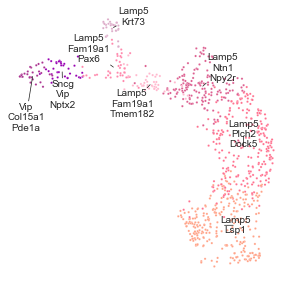

In [8]:
dim = 5
pu.plot_umap_labeled(l1, x=x, y=y, cluster='cluster', palette=palette_mouse, s=5,
                      figsize=(dim, dim), axes=False)
save_plot_multiple(figdir/"f1_mouse_umap", ['svg', 'pdf'])

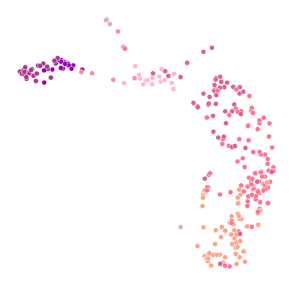

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=mouse_df, x=x, y=y, hue=cluster, palette=palette_mouse, s=25, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend( title='human L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
# plt.savefig(figdir/"s1_mouse_umap_ps.png")
save_plot_multiple(figdir/"s1_mouse_umap_ps", ['svg'])

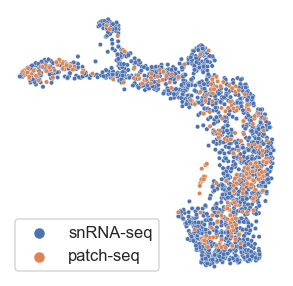

In [8]:
umap_mouse['dataset'] = umap_mouse.index.map(lambda x: 'patch-seq' 
                                             if x in mouse_df.sample_id.unique()
                                             else 'snRNA-seq')
umap_mouse[y] *= -1
plt.figure(figsize=(5,5))
sns.scatterplot(data=umap_mouse, x=x, y=y, hue='dataset', s=20)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
plt.legend()
# plt.savefig(figdir/"s1_mouse_umap_overlap.png")
save_plot_multiple(figdir/"s1_mouse_umap_overlap", ['svg'])

In [14]:
l1['layer'].value_counts()

L1         548
L2/3       268
L1-L4      151
L5          56
L6          43
L4          30
L5-L6       21
L1-L2/3     18
L1-L6        7
L2/3-L4      3
Name: layer, dtype: int64

/tmp/ipykernel_26073/2914678636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1['layer_clean'] = l1['layer'].replace(['L1-L2/3','L1-L6','L2/3-L4'],'L1-L4').replace(['L5','L6'],'L5-L6')


<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

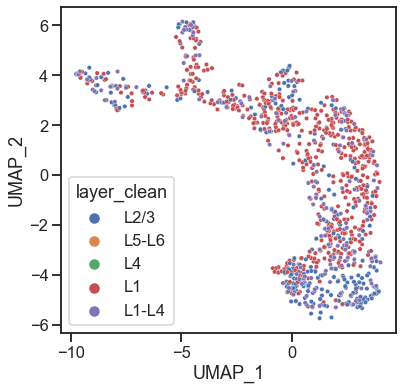

In [45]:
l1['layer_clean'] = l1['layer'].replace(['L1-L2/3','L1-L6','L2/3-L4'],'L1-L4').replace(['L5','L6'],'L5-L6')
plt.figure(figsize=(6,6))
sns.scatterplot(data=l1, x=x, y=y, hue='layer_clean', s=20)

## Human

In [9]:
path = "/allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/facs_seq/MTG_paper_rev/"
human_facs = shiny.load_shiny_data(None, directory=path, drop_offpipeline=False, nms_pass=False).set_index('sample_id')

In [10]:
# umap_df = pd.read_csv("/home/tom.chartrand/work/r_patchseq/l1_manuscript/umap_integrated.csv", index_col=0)
umap_df = pd.read_csv(projectdir/"seurat_human_sct.csv", index_col=0)
human_facs = human_facs.join(umap_df, on='sample_id', how='inner')
human_df = human_df.join(umap_df, on='sample_id', rsuffix='_r')
human_facs['cluster'] = human_facs['cluster'].map(shorten_name).astype(ttypes_human)

In [11]:
l1 = human_facs[human_facs['cluster'].isin(l1_types_human)]

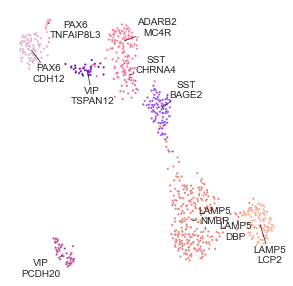

In [13]:
dim = 5
pu.plot_umap_labeled(l1, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=5,
                      figsize=(dim, dim), axes=False, force_points=0.05, force_text=0.15,)
save_plot_multiple(figdir/"f1_human_umap", ['svg'])

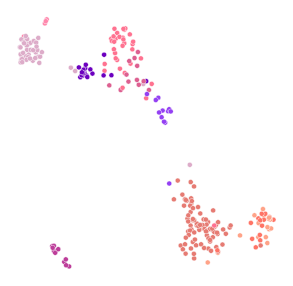

In [23]:

plt.figure(figsize=(5,5))
sns.scatterplot(data=human_df, x='UMAP_1', y='UMAP_2', hue=cluster, palette=palette_human, s=25, legend=None)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend( title='human L1 types', bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
# plt.savefig(figdir/"s1_human_umap_ps.png")
save_plot_multiple(figdir/"s1_human_umap_ps", ['svg'])

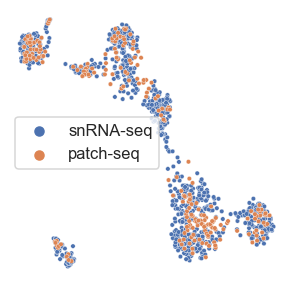

In [15]:
umap_df['dataset'] = umap_df.index.map(lambda x: 'patch-seq' 
                                             if x in human_df.sample_id.unique()
                                             else 'snRNA-seq')
plt.figure(figsize=(5,5))
sns.scatterplot(data=umap_df, x='UMAP_1', y='UMAP_2', hue='dataset', s=20)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
# plt.legend(bbox_to_anchor=(0.5,0), loc='upper center', ncol=2)
plt.legend()
save_plot_multiple(figdir/"s1_human_umap_overlap", ['svg'])

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

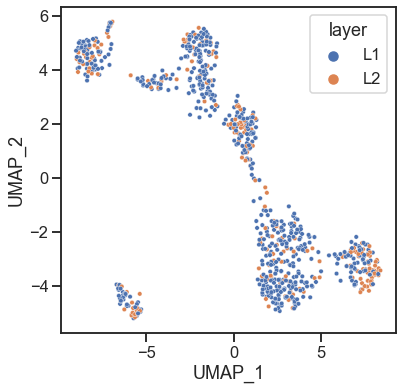

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=l1, x=x, y=y, hue='layer', s=20)

## subclass insets

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].cat.remove_unused_categories()


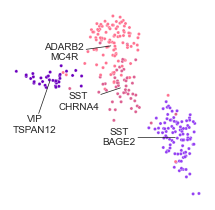

In [26]:
clusters = [
    'SST BAGE2',
    'SST CHRNA4',
    'ADARB2 MC4R',
    'VIP TSPAN12'
]
df = l1[l1['cluster'].isin(clusters)].pipe(remove_unused_categories)
dim = 3.6
pu.plot_umap_labeled(df, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=10,
                      figsize=(dim, dim), axes=False, force_points=0.5, force_text=0.1,)
                     # ylim=(-2.5, 4.2))
save_plot_multiple(figdir/"f4_rosehip_umap", ['svg'])

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].cat.remove_unused_categories()


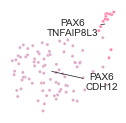

In [27]:
clusters = [
    'PAX6 CDH12',
    'PAX6 TNFAIP8L3',
]
df = l1[l1['cluster'].isin(clusters)].pipe(remove_unused_categories)
dim = 2
pu.plot_umap_labeled(df, x='UMAP_1', y='UMAP_2', cluster='cluster', palette=palette_human, s=10,
                      figsize=(dim, dim), axes=False, force_points=0.5, force_text=0)
save_plot_multiple(figdir/"f5_pax6_umap", ['svg'])